# 1 Data Source

In [1]:
import pandas as pd
import numpy as np

#plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# datetime
import datetime

# standardize variables
from sklearn.preprocessing import StandardScaler

In [2]:
def stacked_area_chart(df, var, value, figsize, legend_size):
  """creates a 100% stacked area chart using the index of dataframe, categories, and the value.
  var will show up in the legend while value is the variable you are interested that changes
  over time.

  stacked_area_chart(df, var, value, figsize, legend_size)

  figsize: size of the plot and it must be a tuple
  legend_size: position of the legend and it must by a tuple as well"""

  temp_table=df.pivot_table(index=df.index, columns=var, values=value)

  # normalize the data
  norm_sum=temp_table.sum(axis=1)

  norm_table=temp_table.divide(norm_sum, axis=0)

  # create a dictionary to hold the stack variables
  sales_store={}

  for store in norm_table.columns:
    sales_store[store]=norm_table.loc[:,store].values

  fig, ax = plt.subplots(figsize=figsize)

  ax.stackplot(norm_table.index, sales_store.values(), labels=sales_store.keys())
  ax.legend(ncol=3, bbox_to_anchor=legend_size)
  plt.show()

In [3]:
# importing the data
features=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/raw_data/Features data set.csv')
sales=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/raw_data/sales data-set.csv')
stores=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/raw_data/stores data-set.csv')

# 2 Data Wrangling

## 2.1 features data

In [4]:
features.shape

(8190, 12)

In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

### 2.1.1 Converting data types

In [7]:
# convert store number to object
features.Store=features.Store.astype(str)

In [8]:
# convert date to date time
features.Date=pd.to_datetime(features.Date)

In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### 2.1.2 range constraints

In [10]:
# summary statistics
features.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
# getting store numbers
features.Store.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'],
      dtype=object)

In [12]:
features.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    8190
unique                    182
top       2010-05-02 00:00:00
freq                       45
first     2010-01-10 00:00:00
last      2013-12-07 00:00:00
Name: Date, dtype: object

### 2.1.3 visualization

In [13]:
ts_features=features.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
ts_features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,211.350143,8.106,False


In [14]:
# setting date as index
ts_features.index=ts_features.Date
ts_features.drop(columns=['Date'], inplace=True)

#checking results
ts_features.head()



,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,,
2010-05-02,1,42.31,2.572,211.096358,8.106,False
2010-12-02,1,38.51,2.548,211.242170,8.106,True
2010-02-19,1,39.93,2.514,211.289143,8.106,False
2010-02-26,1,46.63,2.561,211.319643,8.106,False
2010-05-03,1,46.50,2.625,211.350143,8.106,False


#### 2.1.3.1 CPI

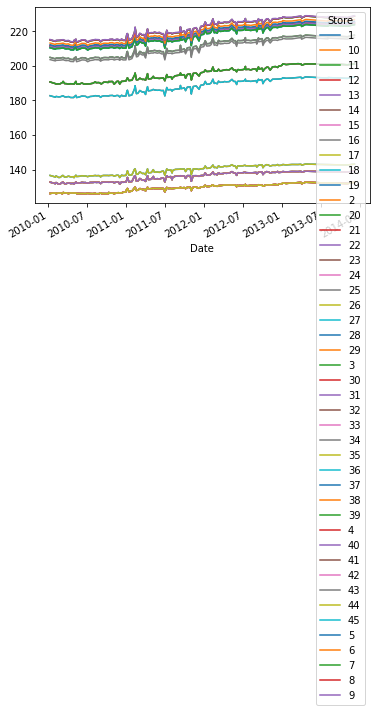

In [15]:
# CPI for each store over time
pd.pivot_table(ts_features.sort_values('Store'), index='Date', columns='Store', values='CPI').plot()
plt.show()

#### 2.1.3.2 temperature

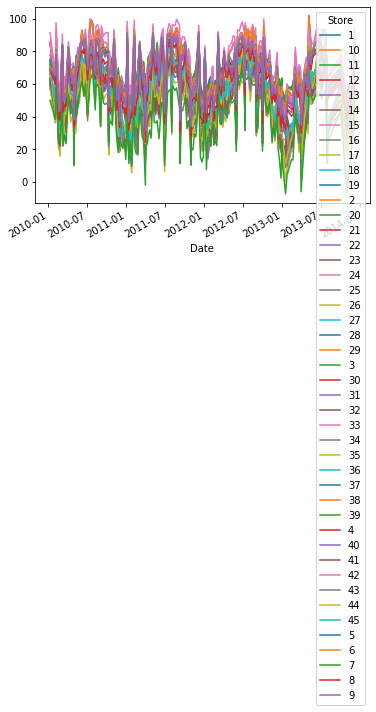

In [16]:
# Temperature for each store over time
pd.pivot_table(ts_features, index='Date', columns='Store', values='Temperature').plot()
plt.show()

#### 2.1.3.3 unemployment

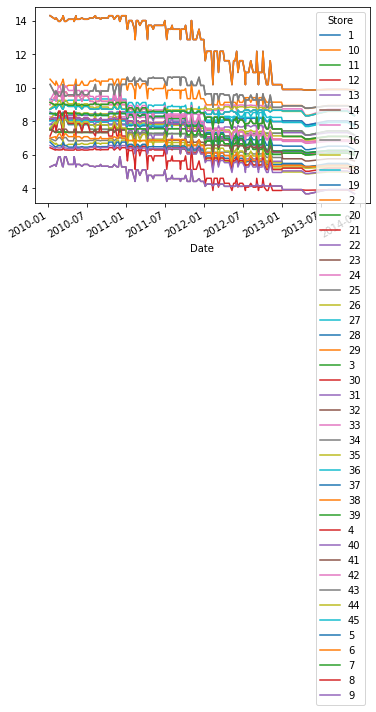

In [17]:
# Unemployment for each store over time
pd.pivot_table(ts_features, index='Date', columns='Store', values='Unemployment').plot()
plt.show()

#### 2.1.3.4 fuel prices

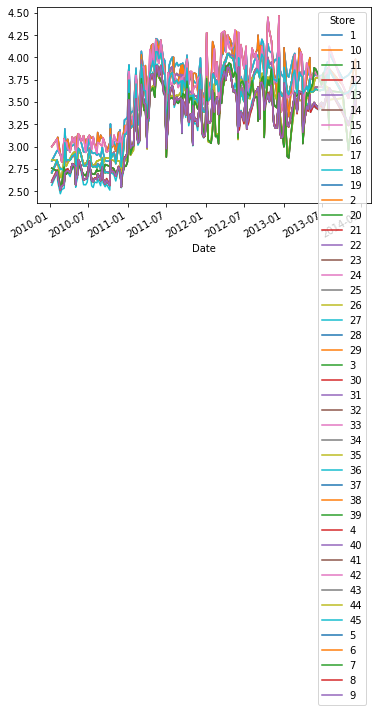

In [18]:
# fuel price for each store's region over time
pd.pivot_table(ts_features, index='Date', columns='Store', values='Fuel_Price').plot()
plt.show()

#### 2.1.3.5 mark downs

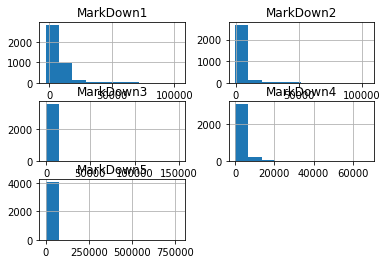

In [19]:
# histograms for mark downs
features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].hist()
plt.show()

In [20]:
#setting date as index to graph data over time
ts_features=features
ts_features.index=features.Date

# dropping date column
ts_features.drop(columns=['Date'], inplace=True)

# checking results
ts_features.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-12-02,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-05-03,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


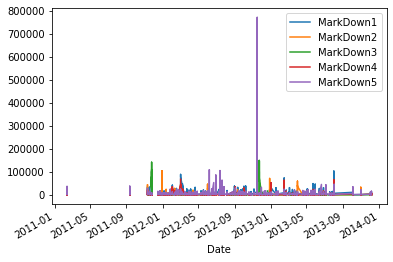

In [21]:
# plotting markdown data over time
ts_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot()
plt.show()

#### 2.1.3.6 is holiday

In [22]:
# checking unique values for isHoliday
features.IsHoliday.unique()

array([False,  True])

In [23]:
# proportion of holidays
holiday_count=pd.DataFrame(features.IsHoliday.value_counts().values, index=['False', 'True'],columns=['count'])

# calculating percentages of holiday and non-holiday days
holiday_count['percent']=holiday_count.apply(lambda row: (row/len(features.IsHoliday))*100)

holiday_count

,count,percent
False,7605,92.857143
True,585,7.142857


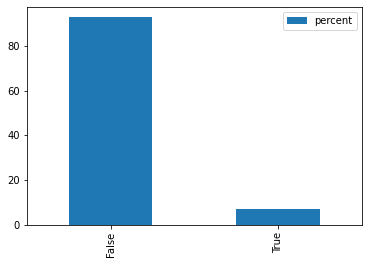

In [24]:
# creating bar plot
holiday_count.plot.bar(y='percent')
plt.show()

In [25]:
del holiday_count

In [26]:
del ts_features

###2.1.4 missing values

In [27]:
count_dict={}

for col in features.columns:
  count_dict[col]=len(features[col])

count_dict

{'Store': 8190,
 'Temperature': 8190,
 'Fuel_Price': 8190,
 'MarkDown1': 8190,
 'MarkDown2': 8190,
 'MarkDown3': 8190,
 'MarkDown4': 8190,
 'MarkDown5': 8190,
 'CPI': 8190,
 'Unemployment': 8190,
 'IsHoliday': 8190}

In [28]:
# determine number of missing data points and percentage of missing points
missing=pd.DataFrame(features.isna().sum(), columns=['number_missing'])
missing['perc_missing']=missing.apply(lambda row: (row/8190)*100)
missing

,number_missing,perc_missing
Store,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,4158,50.769231
MarkDown2,5269,64.334554
MarkDown3,4577,55.885226
MarkDown4,4726,57.704518
MarkDown5,4140,50.549451
CPI,585,7.142857
Unemployment,585,7.142857


In [29]:
del missing
del col

In [30]:
del count_dict

## 2.2 Stores

In [31]:
# number of stores and store features
stores.shape

(45, 3)

In [32]:
# looking at the data
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [33]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

### 2.2.1 converting data types

In [34]:
# convert store to string
stores.Store=stores.Store.astype(str)

# checking results
stores.dtypes

Store    object
Type     object
Size      int64
dtype: object

### 2.2.2 range constraints

In [35]:
stores.describe()

,Size
count,45.000000
mean,130287.600000
std,63825.271991
min,34875.000000
25%,70713.000000
50%,126512.000000
75%,202307.000000
max,219622.000000


### 2.2.3 missing data

In [36]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

### 2.2.4 duplicates

#### 2.2.4.1 store feature

In [37]:
# checking unique store value
stores.Store.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'],
      dtype=object)

In [38]:
stores.duplicated(subset='Store', keep='first').sum()

0

#### 2.2.4.2 store type

In [39]:
# looking for duplicated values for store type
stores.duplicated(subset='Type', keep='first').sum()

42

In [40]:
# checking type
stores.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [41]:
# ensuring each store only has one store type
stores.duplicated(subset=['Store', 'Type'], keep='first').sum()

0

In [42]:
stores.groupby('Type').describe()

Size                                                             \
     count           mean           std      min        25%       50%   
Type                                                                    
A     22.0  177247.727273  49392.621098  39690.0  155840.75  202406.0   
B     17.0  101190.705882  32371.137916  34875.0   93188.00  114533.0   
C      6.0   40541.666667   1304.145033  39690.0   39745.00   39910.0   

                          
           75%       max  
Type                      
A     203819.0  219622.0  
B     123737.0  140167.0  
C      40774.0   42988.0

#### 2.2.4.3 store and store size

In [43]:
stores.duplicated(subset=['Store', 'Size'], keep='first').sum()

0

## 2.3 sales data

In [44]:
sales.shape

(421570, 5)

In [45]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


since isHoliday is already included with features data, we will drop it from sales data

In [46]:
sales.drop(columns=['IsHoliday'], inplace=True)
sales.head() 

,Store,Dept,Date,Weekly_Sales
0,1,1,05/02/2010,24924.50
1,1,1,12/02/2010,46039.49
2,1,1,19/02/2010,41595.55
3,1,1,26/02/2010,19403.54
4,1,1,05/03/2010,21827.90


In [47]:
sales.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
dtype: object

### 2.3.1 converting data types

In [48]:
# convert store and department to strings
sales.Store=sales.Store.astype(str)
sales.Dept=sales.Dept.astype(str)

In [49]:
# convert Date to datetime
sales.Date=pd.to_datetime(sales.Date)

In [50]:
# checking the results
sales.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

### 2.3.2 range constraints

In [51]:
sales.describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


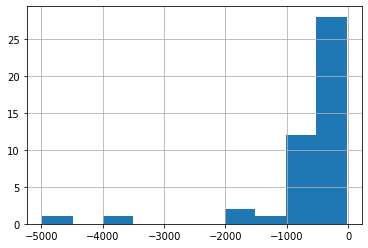

In [52]:
# checking minimum sales distribution for eaach store
sales.groupby('Store')['Weekly_Sales'].min().hist()
plt.show()

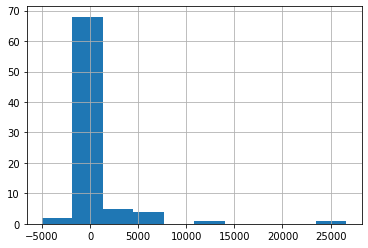

In [53]:
# department minimum weekly sales values histogram
sales.groupby('Dept')['Weekly_Sales'].min().hist()
plt.show()

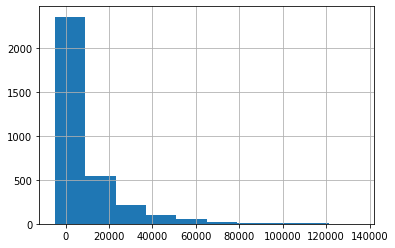

In [54]:
# store and department minimum weekly sales values histogram
sales.groupby(['Store', 'Dept'])['Weekly_Sales'].min().hist()
plt.show()

### 2.3.3 missing data

In [55]:
sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
dtype: int64

### 2.3.4 duplicates

#### 2.3.4.1 store

In [56]:
sales.duplicated(subset='Store', keep='first').sum()

421525

In [57]:
# unique store values
sales.Store.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'],
      dtype=object)

In [58]:
sales.groupby('Store')['Date'].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:677: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))


,count,unique,top,freq,first,last
Store,,,,,,
1,10244,143,2011-12-23,74,2010-01-10,2012-12-10
10,10315,143,2010-02-26,76,2010-01-10,2012-12-10
11,10062,143,2011-09-09,74,2010-01-10,2012-12-10
12,9705,143,2010-03-26,72,2010-01-10,2012-12-10
13,10474,143,2010-12-02,76,2010-01-10,2012-12-10
14,10040,143,2012-11-05,73,2010-01-10,2012-12-10
15,9901,143,2010-12-31,72,2010-01-10,2012-12-10
16,9443,143,2012-06-07,72,2010-01-10,2012-12-10
17,9864,143,2011-09-23,72,2010-01-10,2012-12-10


#### 2.3.4.2 department

In [59]:
# number of duplicated values
sales.duplicated(subset='Dept', keep='first').sum()

421489

In [60]:
# unique department numbers
sales.sort_values(by='Dept')
sales.Dept.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '40', '41', '42', '44', '45', '46', '47', '48',
       '49', '51', '52', '54', '55', '56', '58', '59', '60', '67', '71',
       '72', '74', '77', '78', '79', '80', '81', '82', '83', '85', '87',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '39',
       '50', '43', '65'], dtype=object)

#### 2.3.4.3 store and department

In [61]:
sales.sort_values(by=['Store', 'Dept'])
sales.duplicated(subset=['Store', 'Dept'], keep='first').sum()

418239

In [62]:
sales.groupby(['Store', 'Dept']).describe()

Weekly_Sales                                                  \
                  count          mean          std       min        25%   
Store Dept                                                                
1     1           143.0  22513.322937  9854.349032  14537.37  16494.630   
      10          143.0  31033.386364  3509.190495  23058.41  28905.830   
      11          143.0  24919.270629  6135.183123  16107.93  20129.755   
      12          143.0  10566.545315  1743.067882   6605.12   9521.040   
      13          143.0  38692.880490  2509.848052  32782.17  37186.455   
...                 ...           ...          ...       ...        ...   
9     94           74.0    599.112568  1253.546720      0.28     48.175   
      95          143.0  29575.050769  5429.443089  20283.64  24747.195   
      96          143.0   3596.107762   735.484864   1944.11   3079.820   
      97            9.0    372.655556   290.954675     -9.92    125.850   
      98           14.0     27.930000    26.857125     -1.00      6.000   

                                             
                  50%         75%       max  
Store Dept                                   
1     1     18535.480  23214.2150  57592.12  
      10    30888.690  32686.4150  43718.05  
      11    23607.730  28016.9350  44553.45  
      12    10724.560  11754.9350  15560.17  
      13    38347.520  40106.4450  44863.15  
...               ...         ...       ...  
9     94      151.290    430.4825   6614.75  
      95    29269.080  34089.4800  42202.77  
      96     3606.600   4114.1750   5493.42  
      97      371.050    607.0200    766.93  
      98       18.375     51.5625     75.77  

[3331 rows x 8 columns]

In [63]:
# number of departments per store
pd.DataFrame(sales.drop_duplicates(subset=['Store', 'Dept'], keep='first').groupby('Store')['Dept'].count()).rename(columns={'Dept':'num_dept'}).sort_values('num_dept')

,num_dept
Store,
43,61
44,62
42,62
37,62
38,63
36,63
33,63
30,64
3,72


In [64]:
# distribution of number of departments
pd.DataFrame(sales.drop_duplicates(subset=['Store', 'Dept'], keep='first').groupby('Store')['Dept'].count()).rename(columns={'Dept':'num_dept'}).describe()

,num_dept
count,45.000000
mean,74.022222
std,5.654800
min,61.000000
25%,74.000000
50%,77.000000
75%,77.000000
max,79.000000


In [65]:
# checking results
sales_reduced=pd.DataFrame(sales.drop_duplicates(subset=['Store', 'Dept']).sort_values(by=['Store']))

sales_reduced[sales_reduced.Store=='43'].Dept.unique()

array(['67', '72', '79', '71', '74', '60', '52', '56', '55', '49', '80',
       '46', '59', '81', '96', '83', '85', '87', '90', '91', '92', '93',
       '94', '95', '97', '98', '99', '44', '82', '42', '25', '38', '40',
       '2', '3', '4', '5', '6', '7', '8', '1', '10', '11', '12', '13',
       '14', '9', '17', '16', '32', '31', '28', '27', '26', '33', '24',
       '23', '22', '21', '20', '18'], dtype=object)

In [66]:
del sales_reduced

#### 2.3.4.4 store, department, and date

In [67]:
#making sure that for each store, department and date are unique
sales.duplicated(subset=['Store', 'Dept', 'Date'], keep='first').sum()

0

### 2.3.5 category mismatch

In [68]:
sales.Store.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'],
      dtype=object)

### 2.3.6 visualizing data

#### 2.3.6.1 sales by store

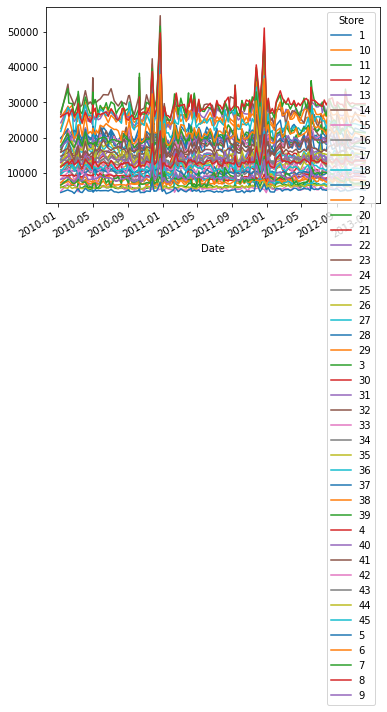

In [69]:
# weekly sales by store
pd.pivot_table(sales, index='Date', columns='Store', values='Weekly_Sales').plot()
plt.show()

#### 2.3.6.2 sales by department

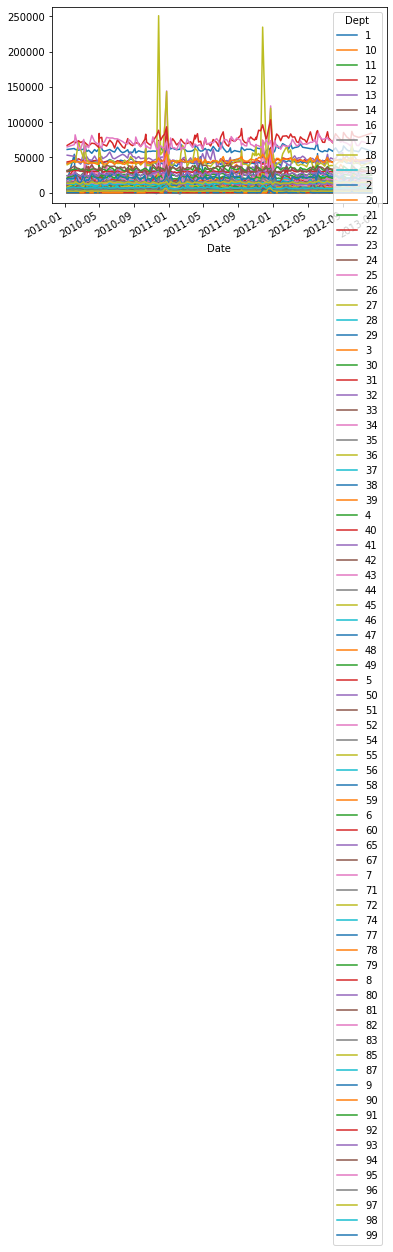

In [70]:
# weekly sales by department
pd.pivot_table(sales, index='Date', columns='Dept', values='Weekly_Sales').plot()
plt.show()

## 2.4 data wrangling Summary

The data is weekly on 45 stores from January 1st 2010 to December 7, 2013. There are supposedly no missing data points; however, there many periods with negative sales data. The number of departments per store ranges between 61 and 79 with a mean of 74 and median of 77. 

Not all stores and departments have the same number of observations. For example, store 9's department 94 has 74 observations while department 97 only has 9 observations.



## 2.5 saving data

In [71]:
# resetting the index to save the data
features.reset_index(inplace=True)
features.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2010-12-02,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,2010-05-03,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [72]:
# saving the data
features.to_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/features_cleaned.csv')
stores.to_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/stores_cleaned.csv')
sales.to_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/sales_cleaned.csv')

In [73]:
# deleting data frames
del features
del stores
del sales

# 3 exploratory data analysis

## 3.1 features

Since most of the univarate analysis was for features was conducted in the data wrangling section, this section will only look at a few things not covered in part two and carry out multivariate analysis

### 3.1.1 importing data

In [74]:
#importing data
features=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/features_cleaned.csv')

In [75]:
features.shape

(8190, 13)

In [76]:
# inspecting first few rows
features.head()

,Unnamed: 0,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0,2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,4,2010-05-03,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [77]:
# dropping column Unnamed:0
features.drop(columns=['Unnamed: 0'], inplace=True)

features.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2010-12-02,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,2010-05-03,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [78]:
# setting Date as index
features.index=features.Date

# dropping Date column
features.drop(columns=['Date'], inplace=True)

# inspecting results
features.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-12-02,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-05-03,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### 3.1.2 missing values

#### 3.1.2.1 cpi data

In [79]:
features.CPI.isna().sum()

585

In [80]:
# descriptive statistics
features.CPI.describe()

count    7605.000000
mean      172.460809
std        39.738346
min       126.064000
25%       132.364839
50%       182.764003
75%       213.932412
max       228.976456
Name: CPI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


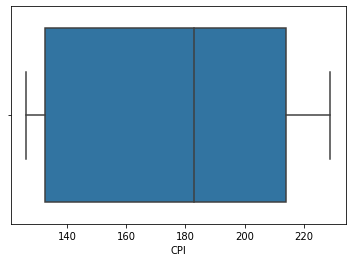

In [81]:
# creating a boxplot
sns.boxplot(features.CPI)
plt.show()

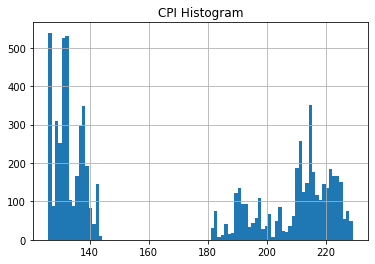

In [82]:
# creating a histogram
features.CPI.hist(bins=int(np.sqrt(len(features.CPI))))
plt.title('CPI Histogram')
plt.show()

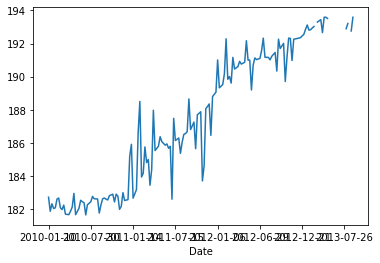

In [83]:
# graphing the median CPI
features.groupby('Date')['CPI'].median().plot()
plt.show()

In [84]:
features[features.CPI.isna()].sort_values('Date').index.unique()

Index(['2013-03-05', '2013-05-07', '2013-05-17', '2013-05-24', '2013-05-31',
       '2013-06-14', '2013-06-21', '2013-06-28', '2013-07-06', '2013-07-19',
       '2013-07-26', '2013-10-05', '2013-12-07'],
      dtype='object', name='Date')

It appears we are missing one week in march 2013, the whole month of May, June, and July, and one week in October and December. The three-month gap could cause issue when trying to input the data, so we may only use the data before this missing period.

#### 3.1.2.2 unemployment

In [85]:
features.Unemployment.describe()

count    7605.000000
mean        7.826821
std         1.877259
min         3.684000
25%         6.634000
50%         7.806000
75%         8.567000
max        14.313000
Name: Unemployment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


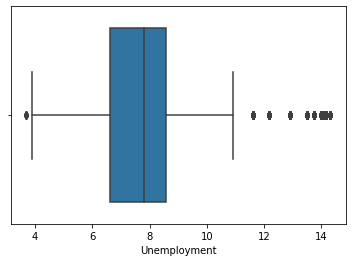

In [86]:
# boxplot
sns.boxplot(features.Unemployment)
plt.show()

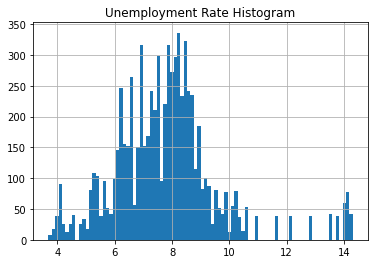

In [87]:
# creating a histogram
features.Unemployment.hist(bins=int(np.sqrt(len(features.Unemployment))))
plt.title('Unemployment Rate Histogram')
plt.show()

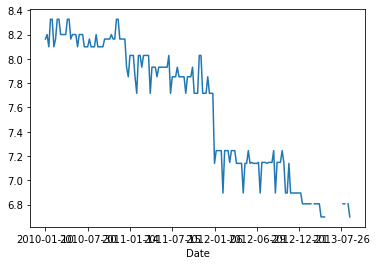

In [88]:
# plotting the median unemployment rate
features.groupby('Date')['Unemployment'].median().plot()
plt.show()

In [89]:
# finding the missing weeks
features[features.Unemployment.isna()].sort_values('Date').index.unique()

Index(['2013-03-05', '2013-05-07', '2013-05-17', '2013-05-24', '2013-05-31',
       '2013-06-14', '2013-06-21', '2013-06-28', '2013-07-06', '2013-07-19',
       '2013-07-26', '2013-10-05', '2013-12-07'],
      dtype='object', name='Date')

Looks like unemployment is missing the same time period as CPI, so we may need to limit our time period to dates before this gap.

### 3.1.3 features summary

For both CPI and unemployment, it appears we are missing one week in march 2013, the whole month of May, June, and July, and one week in October and December. The three-month gap could cause issue when trying to input the data, so we may only use the data before this missing period. Also, CPI seems to have two distinct groups from the histogram.

## 3.2 stores

### 3.2.1 importing data

In [90]:
# loading stores data
stores=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/stores_cleaned.csv')

In [91]:
stores.shape

(45, 4)

In [92]:
# inspecting first few rows
stores.head()

,Unnamed: 0,Store,Type,Size
0,0,1,A,151315
1,1,2,A,202307
2,2,3,B,37392
3,3,4,A,205863
4,4,5,B,34875


In [93]:
# dropping Unnamed: 0 column
stores.drop(columns=['Unnamed: 0'], inplace=True)

# checking results
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [94]:
# checking store data types
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [95]:
# convert store to string
stores.Store=stores.Store.astype(str)

# checking results
stores.dtypes

Store    object
Type     object
Size      int64
dtype: object

### 3.2.2 store type

In [96]:
stores.groupby('Type').describe()

Size                                                             \
     count           mean           std      min        25%       50%   
Type                                                                    
A     22.0  177247.727273  49392.621098  39690.0  155840.75  202406.0   
B     17.0  101190.705882  32371.137916  34875.0   93188.00  114533.0   
C      6.0   40541.666667   1304.145033  39690.0   39745.00   39910.0   

                          
           75%       max  
Type                      
A     203819.0  219622.0  
B     123737.0  140167.0  
C      40774.0   42988.0

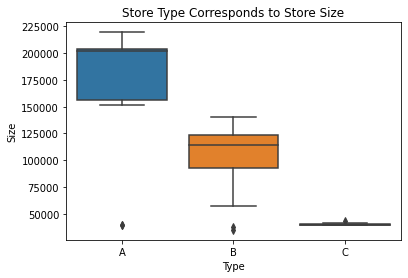

In [97]:
# boxplot of store size by store type
sns.boxplot(x=stores.Type, y=stores.Size)
plt.title('Store Type Corresponds to Store Size')
plt.show()

### 3.2.3 store size

In [98]:
stores.Size.describe()

count        45.000000
mean     130287.600000
std       63825.271991
min       34875.000000
25%       70713.000000
50%      126512.000000
75%      202307.000000
max      219622.000000
Name: Size, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


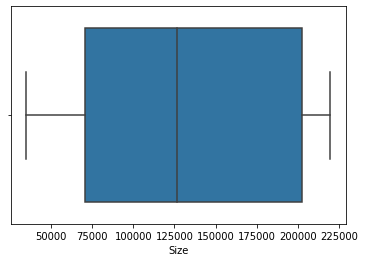

In [99]:
# boxplot
sns.boxplot(stores.Size)
plt.show()

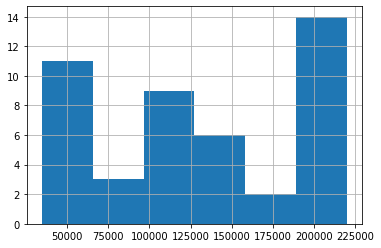

In [100]:
# historgram
stores.Size.hist(bins=int(np.sqrt(len(stores.Size))))
plt.show()

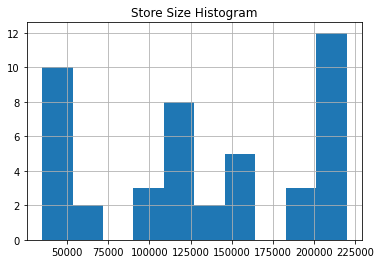

In [101]:
# histogram with default bin size
stores.Size.hist()
plt.title('Store Size Histogram')
plt.show()

### 3.2.4 stores summary

Each of the three store types seem to correspond to a certain range of store sizes since the boxplots only overlap with the potential outliers. Additionally, the store size as an interesting histogram shape where there are three different groups, which likely coincide with the three types of stores, which suggests, we can use the three store types in lieu of using store size. One limitation of store size is that type C only has 6 stores while A and B have 22 and 17, respectively.

## 3.3 sales

### 3.3.1 importing data

In [102]:
sales=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/sales_cleaned.csv')

In [103]:
sales.shape

(421570, 5)

In [104]:
sales.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales
0,0,1,1,2010-05-02,24924.50
1,1,1,1,2010-12-02,46039.49
2,2,1,1,2010-02-19,41595.55
3,3,1,1,2010-02-26,19403.54
4,4,1,1,2010-05-03,21827.90


In [105]:
# droping Unnamed: 0 column
sales.drop(columns=['Unnamed: 0'], inplace=True)
sales.head()

,Store,Dept,Date,Weekly_Sales
0,1,1,2010-05-02,24924.50
1,1,1,2010-12-02,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-05-03,21827.90


In [106]:
# checking data types
sales.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
dtype: object

In [107]:
# converting store and dept to strings
sales.Store=sales.Store.astype(str)
sales.Dept=sales.Dept.astype(str)

# converting Date to date time
sales.Date=pd.to_datetime(sales.Date)

# checking data types
sales.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

In [108]:
# set Date as index
sales.index=sales.Date

# drop Date column
sales.drop(columns=['Date'], inplace=True)

# checking results
sales.head()

,Store,Dept,Weekly_Sales
Date,,,
2010-05-02,1,1,24924.50
2010-12-02,1,1,46039.49
2010-02-19,1,1,41595.55
2010-02-26,1,1,19403.54
2010-05-03,1,1,21827.90


In [109]:
# descriptive statistics
sales.Weekly_Sales.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

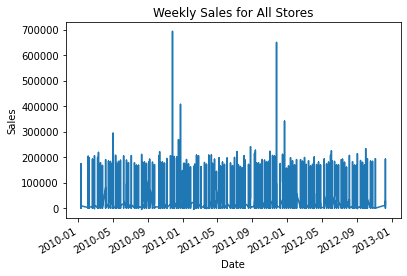

In [110]:
sales.Weekly_Sales.plot()
plt.title('Weekly Sales for All Stores')
plt.ylabel('Sales')
plt.show()

In [111]:
sales.Weekly_Sales.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

### 3.3.2 sales by store

In [112]:
# sum median sales for each store
store_sum=sales.groupby('Store')['Weekly_Sales'].median().sum()

# get percent
store_perc_sales=sales.groupby('Store')['Weekly_Sales'].median().apply(lambda row: (row/store_sum)*100).sort_values(ascending=False)

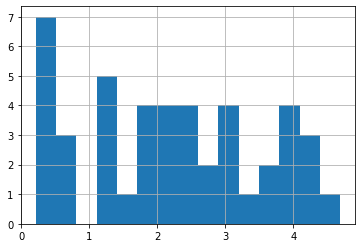

In [113]:
store_perc_sales.hist(bins=15)
plt.show()

In [114]:
sales.groupby('Store')['Weekly_Sales'].median().describe()

count       45.000000
mean      7699.636667
std       4595.957372
min        751.255000
25%       4205.470000
50%       7164.160000
75%      11016.425000
max      16249.780000
Name: Weekly_Sales, dtype: float64

#### 3.3.2.1 box plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


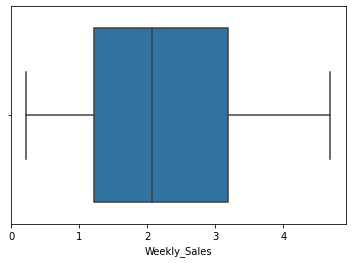

In [115]:
# box plot
sns.boxplot(store_perc_sales)
plt.show()

#### 3.3.2.2 histogram

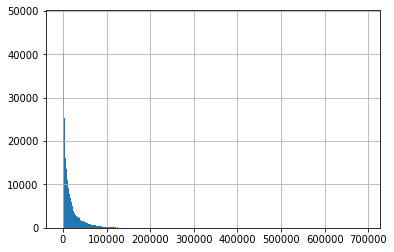

In [116]:
# historgram
sales.Weekly_Sales.hist(bins=int(np.sqrt(len(sales.Weekly_Sales))))
plt.show()

#### 3.3.2.3 area chart

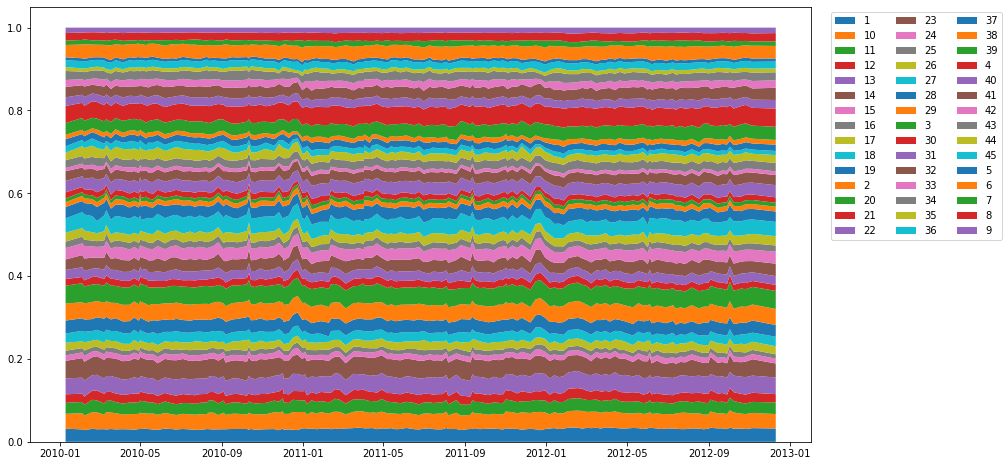

In [117]:
stacked_area_chart(sales, 'Store', 'Weekly_Sales', (14, 8), (1.25, 1))

#### 3.3.2.4 percentage of sales by store

In [118]:
# sum median sales for each department
store_sum=sales.groupby('Store')['Weekly_Sales'].median().sum()

# get percent
store_perc_sales=sales.groupby('Store')['Weekly_Sales'].median().apply(lambda row: (row/store_sum)*100).sort_values(ascending=False)

In [119]:
store_perc_sales

Store
20    4.689912
14    4.389473
4     4.362922
2     4.136856
13    4.045921
10    4.023691
6     3.936070
27    3.932639
19    3.581714
11    3.556332
23    3.461351
39    3.179493
28    3.157993
24    3.039806
1     2.969657
18    2.678920
35    2.658602
41    2.576593
31    2.456487
22    2.386902
12    2.349785
32    2.188939
8     2.067676
26    2.044387
40    2.017408
17    1.950495
21    1.934795
34    1.928104
45    1.737254
25    1.598681
15    1.385021
29    1.360105
7     1.320478
9     1.213757
16    1.193393
3     0.809509
5     0.745392
36    0.549315
43    0.500032
37    0.497253
42    0.373409
30    0.302453
33    0.263450
44    0.230755
38    0.216823
Name: Weekly_Sales, dtype: float64

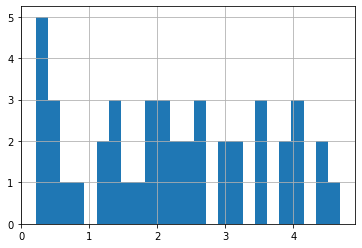

In [120]:
# histogram of percentage of store sales
store_perc_sales.hist(bins=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


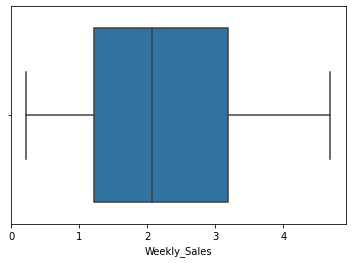

In [121]:
# boxplot for store percentage sales
sns.boxplot(store_perc_sales)
plt.show()

#### 3.3.2.5 sales by store summary

stacked 100% area charts suggests sales by store has remained the same over time. Furthermore, the distribution of percentage of sales by stores is slightly right skewed; however, the boxplot does not show any potential outliers.

### 3.3.3 sales by department

#### 3.3.3.1 percentage of sales by department

In [122]:
sales.groupby('Dept')['Weekly_Sales'].median().sort_values(ascending=False)

Dept
92    61816.77
95    60774.39
38    57336.65
65    47281.16
72    44312.36
        ...   
45       14.94
51       11.00
39       10.43
78        9.88
43        0.75
Name: Weekly_Sales, Length: 81, dtype: float64

In [123]:
# sum median sales for each department
dept_sum=sales.groupby('Dept')['Weekly_Sales'].median().sum()

# get percent
dept_perc_sales=sales.groupby('Dept')['Weekly_Sales'].median().apply(lambda row: (row/dept_sum)*100).sort_values(ascending=False)

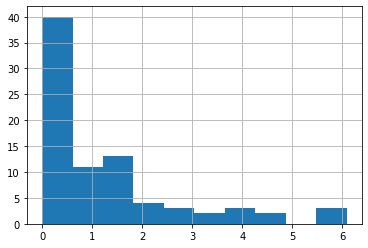

In [124]:
# histogram
dept_perc_sales.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


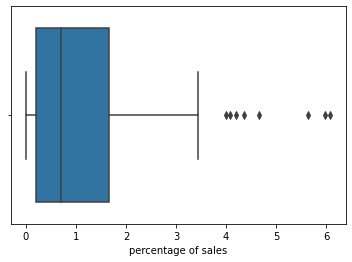

In [125]:
# box plot
sns.boxplot(dept_perc_sales)
plt.xlabel('percentage of sales')
plt.show()

#### 3.3.3.2 100% area stacked chart

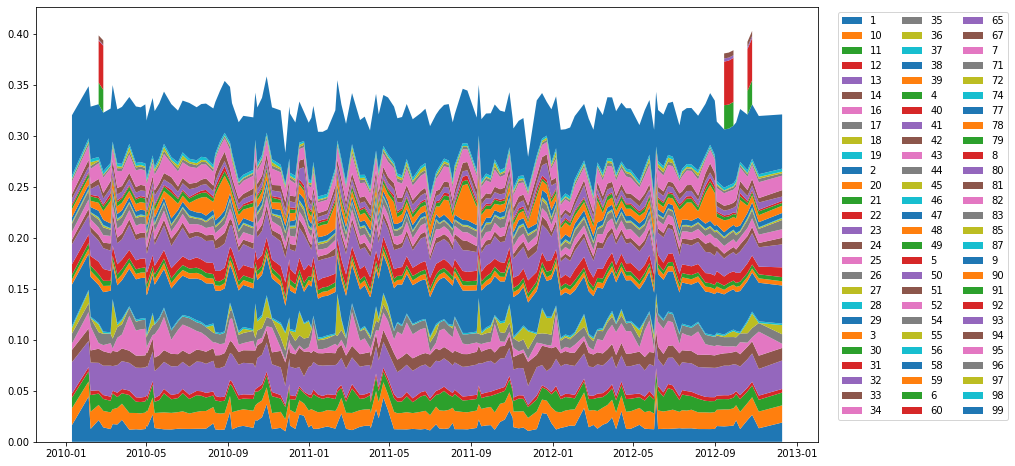

In [126]:
stacked_area_chart(sales, 'Dept', 'Weekly_Sales', (14, 8), (1.25, 1))

In [127]:
del store_sum

#### 3.3.3.3 sales by department summary

The 100% stacked area chart shows that the composition of total sales by department has stayed roughly the same over the years with a few departments contributing more. The distribution of percentage of sales shows there a few potential outliers that are worth further studying.

## 3.4 sales, features and store data

### 3.4.1 importing data

In [128]:
sales=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/sales_cleaned.csv')
stores=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/stores_cleaned.csv')
features=pd.read_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/features_cleaned.csv')

In [129]:
features.head()

,Unnamed: 0,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0,2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,4,2010-05-03,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [130]:
# converting store and department to string
sales.Store=sales.Store.astype(str)
sales.Dept=sales.Dept.astype(str)

In [131]:
# convert store to string
features.Store=features.Store.astype(str)

# drop Unnamed: 0
features.drop(columns=['Unnamed: 0'], inplace=True)
features.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2010-12-02,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,2010-05-03,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [132]:
stores.dtypes

# convert Store to string
stores.Store=stores.Store.astype(str)

# drop Unnamed: 0 column
stores.drop(columns=['Unnamed: 0'], inplace=True)

# check results
stores.dtypes

Store    object
Type     object
Size      int64
dtype: object

### 3.4.2 store size and weekly sales

In [133]:
# aggregate sales data at the store level
sales_store=pd.DataFrame(sales.groupby('Store')['Weekly_Sales'].median().values, index=sales.groupby('Store')['Weekly_Sales'].median().index, columns=['median_weekly_sales'])
sales_store.head()

,median_weekly_sales
Store,
1,10289.375
10,13941.430
11,12322.110
12,8141.620
13,14018.455


In [134]:
# merge sales_store with stores
sales_by_store=sales_store.merge(stores, how='left', on='Store')
sales_by_store.head()

,Store,median_weekly_sales,Type,Size
0,1,10289.375,A,151315
1,10,13941.430,B,126512
2,11,12322.110,A,207499
3,12,8141.620,B,112238
4,13,14018.455,A,219622


In [135]:
del sales_store

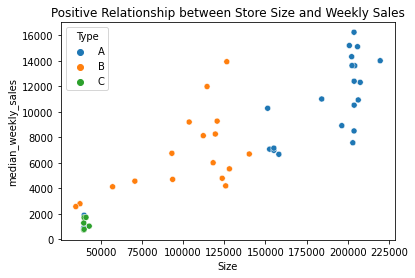

In [136]:
# scatter plot of median weekly sales by store size
sns.scatterplot(x=sales_by_store.Size, y=sales_by_store.median_weekly_sales, hue=sales_by_store.Type)
plt.title('Positive Relationship between Store Size and Weekly Sales')
plt.show()

### 3.4.3 store size and number of departments

In [137]:
# calculate number of departments per store
num_dept_per_store=pd.DataFrame(sales.drop_duplicates(subset=['Store', 'Dept'], keep='first').groupby('Store')['Dept'].count()).rename(columns={'Dept':'num_dept'}).sort_values('Store')

In [138]:
# merge sales by store and number of departments by store
dept_size=sales_by_store.merge(num_dept_per_store, how='left', on='Store')

In [139]:
stores=dept_size

In [140]:
del sales_by_store

In [141]:
del num_dept_per_store
del dept_size

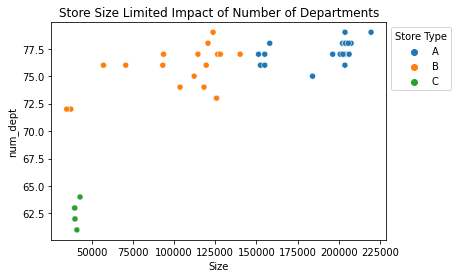

In [142]:
# scatter plot of store size vs number of departments
fig, ax=plt.subplots()
sns.scatterplot(x=stores.Size, y=stores.num_dept, ax=ax, hue=stores.Type)
ax.set_title('Store Size Limited Impact of Number of Departments')
ax.legend(title='Store Type',bbox_to_anchor=(1,1))
plt.show()

In [143]:
del ax
del fig

### 3.4.4 sales and markdowns

In [144]:
# merge sales, features, and stores
sales_features=sales.merge(features, how='left', on=['Date', 'Store']).merge(stores, how='left', on='Store')

In [145]:
sales_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           421570 non-null  int64  
 1   Store                421570 non-null  object 
 2   Dept                 421570 non-null  object 
 3   Date                 421570 non-null  object 
 4   Weekly_Sales         421570 non-null  float64
 5   Temperature          421570 non-null  float64
 6   Fuel_Price           421570 non-null  float64
 7   MarkDown1            150681 non-null  float64
 8   MarkDown2            111248 non-null  float64
 9   MarkDown3            137091 non-null  float64
 10  MarkDown4            134967 non-null  float64
 11  MarkDown5            151432 non-null  float64
 12  CPI                  421570 non-null  float64
 13  Unemployment         421570 non-null  float64
 14  IsHoliday            421570 non-null  bool   
 15  median_weekly_sal

In [146]:
del sales
del features
del stores

In [147]:
# drop unnamed 0 column
sales_features.drop(columns=['Unnamed: 0'], inplace=True)

sales_features.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,median_weekly_sales,Type,Size,num_dept
0,1,1,2010-05-02,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10289.375,A,151315,77
1,1,1,2010-12-02,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,10289.375,A,151315,77
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,10289.375,A,151315,77
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,10289.375,A,151315,77
4,1,1,2010-05-03,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,10289.375,A,151315,77


#### 3.4.4.1 median mardowns and sales

In [148]:
# sales and markdown
sales=sales_features.groupby('Store')['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'Weekly_Sales'].median()

df=pd.DataFrame(sales.values, index=sales.index, columns=['median_markdown1','median_markdown2','median_markdown3','median_markdown4','median_markdown5', 'median_weekly_sales'])

sales=df.merge(sales_features[['Store','Type']], how='left', on='Store')

df=sales

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Store,median_markdown1,median_markdown2,median_markdown3,median_markdown4,median_markdown5,median_weekly_sales,Type
0,1,6154.14,137.86,30.23,1822.55,4325.19,10289.375,A
1,1,6154.14,137.86,30.23,1822.55,4325.19,10289.375,A
2,1,6154.14,137.86,30.23,1822.55,4325.19,10289.375,A
3,1,6154.14,137.86,30.23,1822.55,4325.19,10289.375,A
4,1,6154.14,137.86,30.23,1822.55,4325.19,10289.375,A


In [149]:
del sales

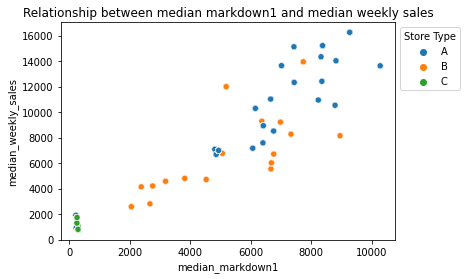

In [150]:
# sales and markdown1
sns.scatterplot(x=df.median_markdown1, y=df.median_weekly_sales, hue=df.Type)
plt.title('Relationship between median markdown1 and median weekly sales')
plt.legend(title='Store Type', bbox_to_anchor=(1,1))
plt.show()

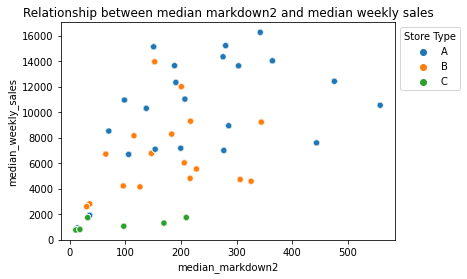

In [151]:
# sales and markdown2
sns.scatterplot(x=df.median_markdown2, y=df.median_weekly_sales, hue=df.Type)
plt.title('Relationship between median markdown2 and median weekly sales')
plt.legend(title='Store Type', bbox_to_anchor=(1,1))
plt.show()

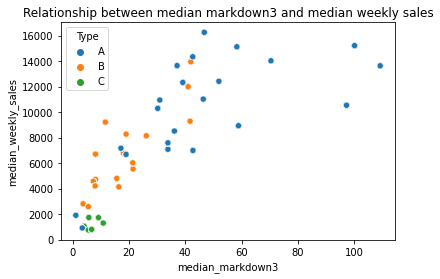

In [152]:
# sales and markdown3
sns.scatterplot(x=df.median_markdown3, y=df.median_weekly_sales, hue=df.Type)
plt.title('Relationship between median markdown3 and median weekly sales')
plt.show()

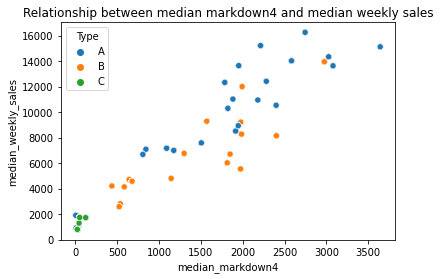

In [153]:
# sales and markdown4
sns.scatterplot(x=df.median_markdown4, y=df.median_weekly_sales, hue=df.Type)
plt.title('Relationship between median markdown4 and median weekly sales')
plt.show()

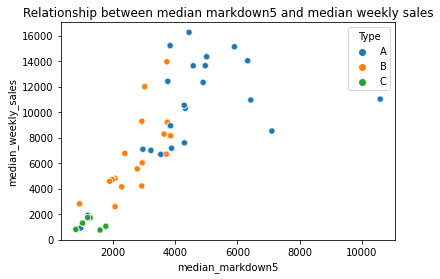

In [154]:
# sales and markdown5
sns.scatterplot(x=df.median_markdown5, y=df.median_weekly_sales, hue=df.Type)
plt.title('Relationship between median markdown5 and median weekly sales')
plt.show()

#### 3.4.4.2 markdowns over time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


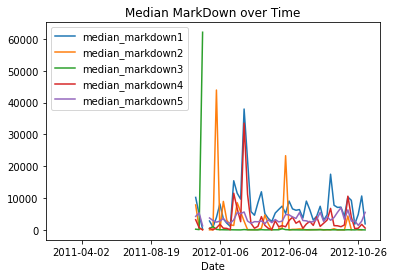

In [155]:
# ploting median markdown vs time
sales=sales_features.groupby('Date')['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'].median()
df=pd.DataFrame(sales.values, index=sales.index, columns=['median_markdown1','median_markdown2','median_markdown3','median_markdown4','median_markdown5'])
df.plot()
plt.title('Median MarkDown over Time')
plt.show()

In [156]:
del df
del sales

### 3.4.5 Sales and CPI

#### 3.4.5.1 store level data

In [157]:
# inspecting first few rows
sales_features.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,median_weekly_sales,Type,Size,num_dept
0,1,1,2010-05-02,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10289.375,A,151315,77
1,1,1,2010-12-02,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,10289.375,A,151315,77
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,10289.375,A,151315,77
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,10289.375,A,151315,77
4,1,1,2010-05-03,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,10289.375,A,151315,77


In [158]:
# aggregating sales and cpi by stores
sales=pd.DataFrame(sales_features.groupby('Store')['Weekly_Sales', 'CPI'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [159]:
# merge sales with store type
sales2=sales.merge(sales_features[['Store', 'Type']], how='left', on='Store')

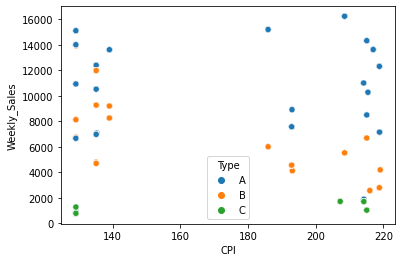

In [160]:
# scatter plot
sales=sales2
sns.scatterplot(x=sales.CPI, y=sales.Weekly_Sales, hue=sales.Type)
plt.show()

In [161]:
del sales2

In [162]:
del sales

#### 3.4.5.2 weekly level

In [163]:
# aggregate cpi and weekly sales at the weekly level
sales=pd.DataFrame(sales_features.groupby('Date')['Weekly_Sales', 'CPI'].median())
sales.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Weekly_Sales,CPI
Date,,
2010-01-10,6940.74,182.716838
2010-02-04,8658.89,181.865754
2010-02-07,8117.29,182.318780
2010-02-19,8411.25,182.034782
2010-02-26,7235.80,182.077469


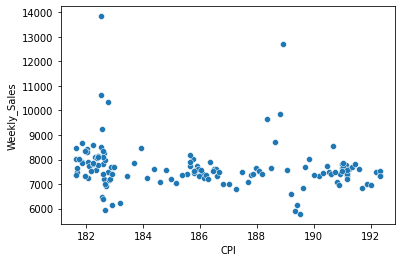

In [164]:
sns.scatterplot(x=sales.CPI, y=sales.Weekly_Sales)
plt.show()

In [165]:
del sales

### 3.4.6 sales and unemployment

#### 3.4.6.1 store level

In [166]:
sales_features.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'median_weekly_sales', 'Type', 'Size',
       'num_dept'],
      dtype='object')

In [167]:
# aggregating sales and unemployment at the store level
sales_unemploy=pd.DataFrame(sales_features.groupby('Store')['Weekly_Sales', 'Unemployment'].median())
sales_unemploy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Weekly_Sales,Unemployment
Store,,
1,10289.375,7.787
10,13941.430,8.494
11,12322.110,7.346
12,8141.620,13.736
13,14018.455,7.193


Since weekly sales and unemployment are on different scales, we will standardize the data

In [168]:
# standardize the data
scaler=StandardScaler()

sales_unemploy_stand=pd.DataFrame(scaler.fit_transform(sales_unemploy), columns=['Weekly_Sales', 'Unemployment'])
sales_unemploy_stand.head()

,Weekly_Sales,Unemployment
0,0.569849,-0.183036
1,1.373451,0.199798
2,1.017134,-0.421833
3,0.097255,3.038291
4,1.390400,-0.504681


In [169]:
del scaler

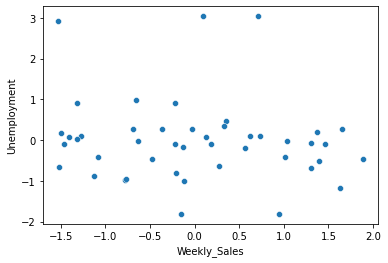

In [170]:
sales_unemploy=sales_unemploy_stand

sns.scatterplot(x=sales_unemploy.Weekly_Sales, y=sales_unemploy.Unemployment)
plt.show()

In [171]:
del sales_unemploy_stand

In [172]:
sales_unemploy.corr()

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.130199
Unemployment,-0.130199,1.000000


In [173]:
del sales_unemploy

#### 3.4.6.2 weekly level

In [174]:
# aggregating sales at the weekly level
sales_unemploy=pd.DataFrame(sales_features.groupby('Date')['Weekly_Sales', 'Unemployment'].median())
sales_unemploy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Weekly_Sales,Unemployment
Date,,
2010-01-10,6940.74,8.163
2010-02-04,8658.89,8.200
2010-02-07,8117.29,8.099
2010-02-19,8411.25,8.324
2010-02-26,7235.80,8.324


In [175]:
# initiate scaler
scaler=StandardScaler()

# scale the data
sales_unemploy=pd.DataFrame(scaler.fit_transform(sales_unemploy), columns=['Weekly_Sales','Unemployment'])

# checking results
sales_unemploy.head()

,Weekly_Sales,Unemployment
0,-0.772945,0.933045
1,1.016755,1.018867
2,0.452600,0.784596
3,0.758802,1.306487
4,-0.465598,1.306487


In [176]:
del scaler

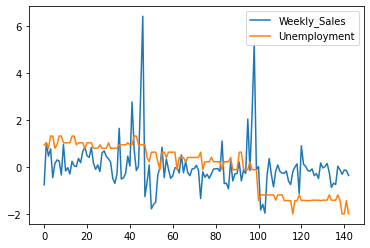

In [177]:
# plotting sales and unemployment
sales_unemploy.plot()
plt.show()

In [178]:
# correlation
sales_unemploy.corr()

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,0.209593
Unemployment,0.209593,1.000000


In [179]:
del sales_unemploy

### 3.4.7 sales and fuel price

#### 3.4.7.1 store level

In [180]:
# aggregating at store level
sales_fuel=pd.DataFrame(sales_features.groupby('Store')['Weekly_Sales','Fuel_Price'].median())
sales_fuel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Weekly_Sales,Fuel_Price
Store,,
1,10289.375,3.290
10,13941.430,3.675
11,12322.110,3.290
12,8141.620,3.705
13,14018.455,3.380


In [181]:
# standardize data

#initiate the scaler
scaler=StandardScaler()

#standardize the data
sales_fuel=pd.DataFrame(scaler.fit_transform(sales_fuel), columns=['Weekly_Sales','Fuel_Price'])

# checking results
sales_fuel.head()

,Weekly_Sales,Fuel_Price
0,0.569849,-1.032361
1,1.373451,1.262732
2,1.017134,-1.032361
3,0.097255,1.441570
4,1.390400,-0.495846


In [182]:
del scaler

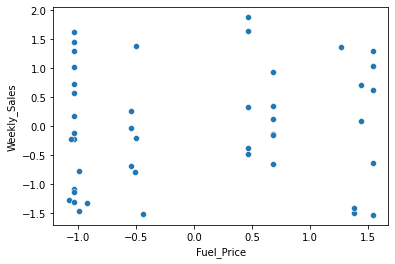

In [183]:
# scatter plot
sns.scatterplot(x=sales_fuel.Fuel_Price, y=sales_fuel.Weekly_Sales)
plt.show()

In [184]:
del sales_fuel

#### 3.4.7.2 weekly level

In [185]:
sales_fuel=pd.DataFrame(sales_features.groupby('Date')['Weekly_Sales','Fuel_Price'].median())
sales_fuel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Weekly_Sales,Fuel_Price
Date,,
2010-01-10,6940.74,2.717
2010-02-04,8658.89,2.826
2010-02-07,8117.29,2.814
2010-02-19,8411.25,2.654
2010-02-26,7235.80,2.667


In [186]:
# standard the data
scaler=StandardScaler()

# fit the data
sales_fuel=pd.DataFrame(scaler.fit_transform(sales_fuel), index=sales_fuel.index, columns=['Weekly_Sales','Fuel_Price'])

# checking results
sales_fuel.head()

,Weekly_Sales,Fuel_Price
Date,,
2010-01-10,-0.772945,-1.444420
2010-02-04,1.016755,-1.181548
2010-02-07,0.452600,-1.210488
2010-02-19,0.758802,-1.596355
2010-02-26,-0.465598,-1.565003


In [187]:
del scaler

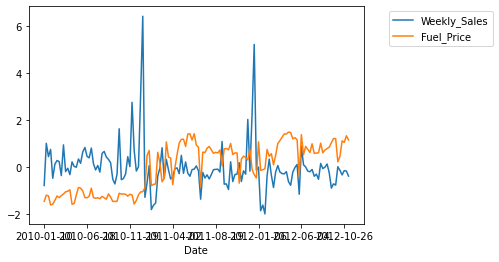

In [188]:
# plotting
sales_fuel.plot()
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

In [189]:
# correlation coefficient
sales_fuel.corr()

,Weekly_Sales,Fuel_Price
Weekly_Sales,1.000000,-0.206404
Fuel_Price,-0.206404,1.000000


In [190]:
del sales_fuel

### 3.4.8 drivers of neagtive sales

In [191]:
sales_features['sales_type']=['negative_sales' if sale<0 else 'positive_sales' for sale in sales_features.Weekly_Sales]

sales_features.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,median_weekly_sales,Type,Size,num_dept,sales_type
0,1,1,2010-05-02,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10289.375,A,151315,77,positive_sales
1,1,1,2010-12-02,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,10289.375,A,151315,77,positive_sales
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,10289.375,A,151315,77,positive_sales
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,10289.375,A,151315,77,positive_sales
4,1,1,2010-05-03,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,10289.375,A,151315,77,positive_sales


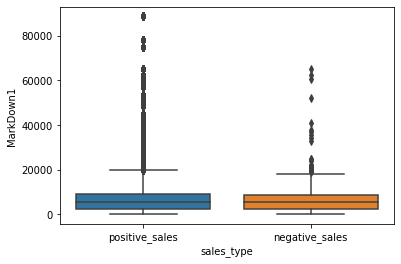

In [192]:
sns.boxplot(x=sales_features.sales_type, y=sales_features.MarkDown1)
plt.show()

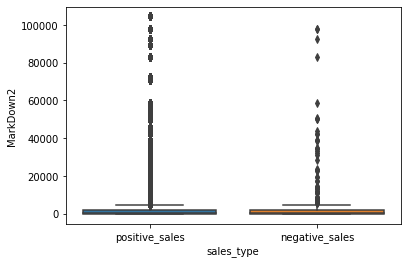

In [193]:
sns.boxplot(x=sales_features.sales_type, y=sales_features.MarkDown2)
plt.show()

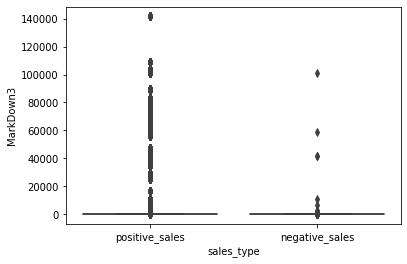

In [194]:
sns.boxplot(x=sales_features.sales_type, y=sales_features.MarkDown3)
plt.show()

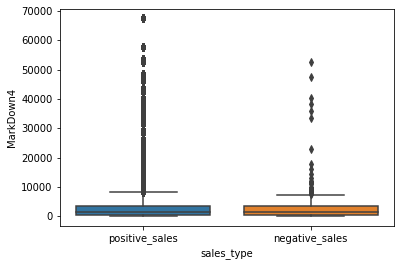

In [195]:
sns.boxplot(x=sales_features.sales_type, y=sales_features.MarkDown4)
plt.show()

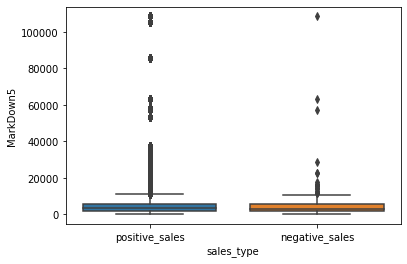

In [196]:
sns.boxplot(x=sales_features.sales_type, y=sales_features.MarkDown5)
plt.show()

In [197]:
def negative_distribution(df,var):
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  ax[0].hist(df.loc[sales_features.sales_type =='negative_sales',var])
  ax[1].hist(df.loc[sales_features.sales_type =='positive_sales',var])
  ax[0].set_title('{} negative sales distribution'.format(var))
  ax[1].set_title('{} positive sales distribution'.format(var))
  plt.show()

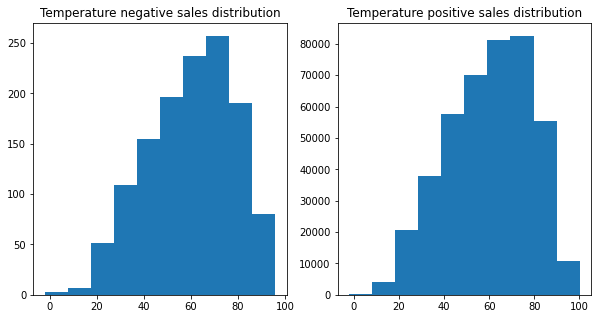

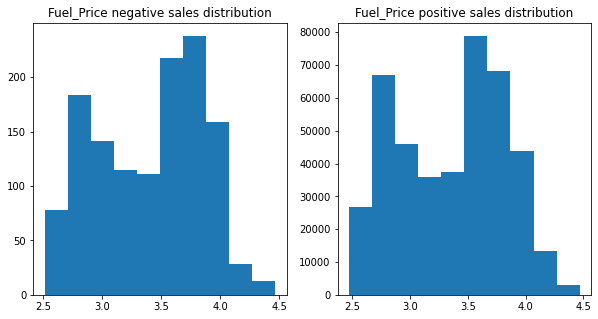

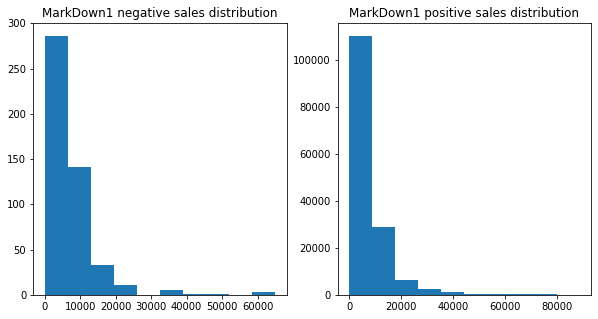

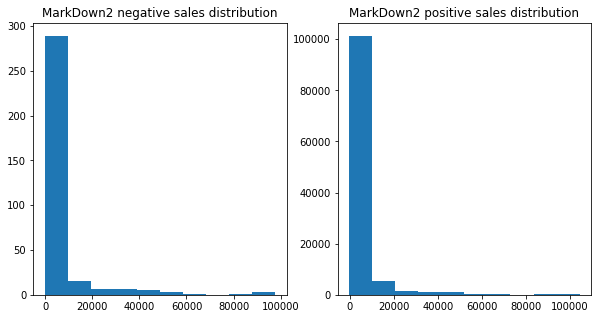

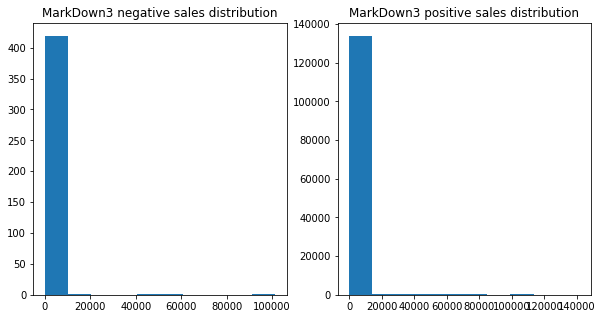

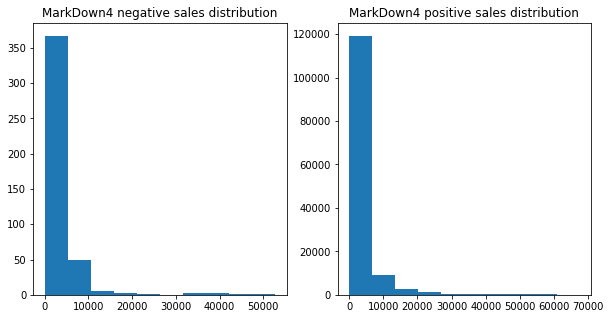

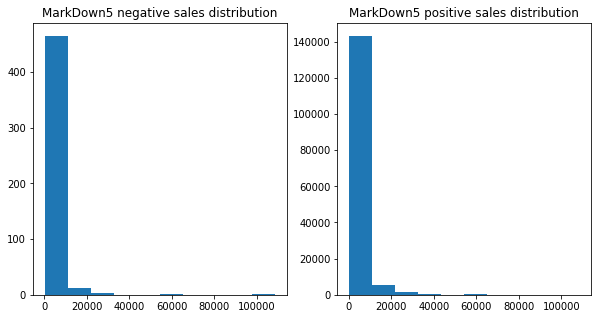

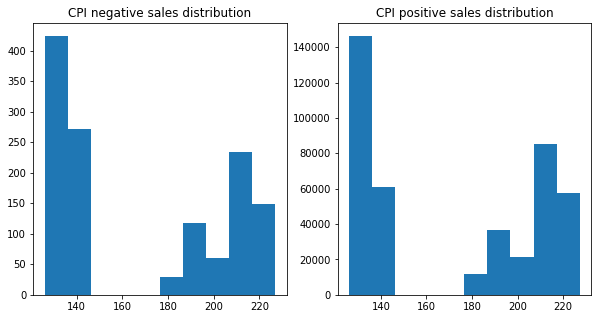

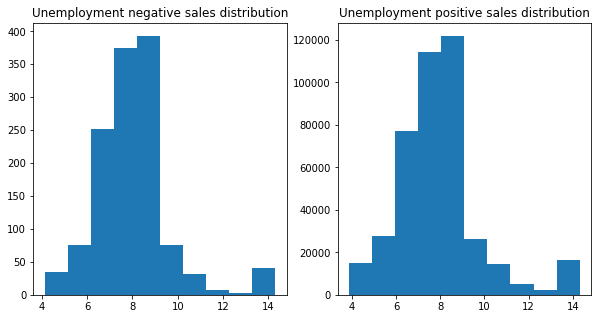

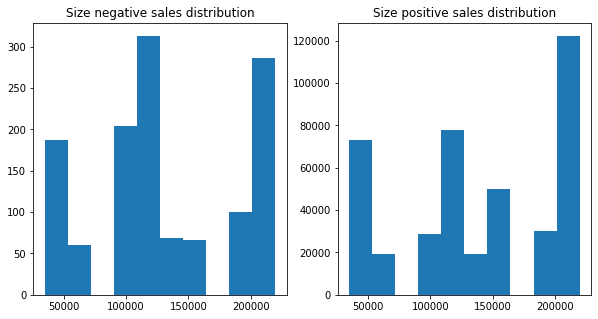

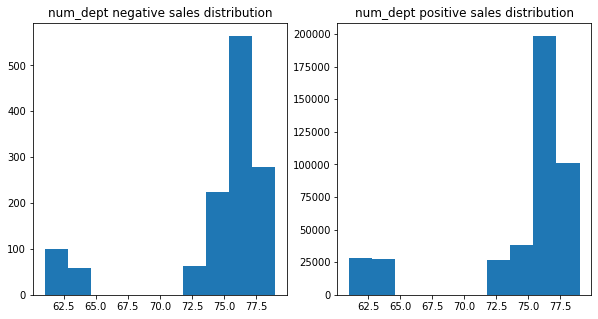

In [198]:
for var in ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'num_dept']:
  negative_distribution(sales_features,var)


In [199]:
# group by sales type
sales_features.groupby('sales_type').median()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,median_weekly_sales,Size,num_dept
sales_type,,,,,,,,,,,,,,
negative_sales,-13.20,62.17,3.506,5430.75,211.975,22.84,1303.34,3019.005,142.017793,8.067,0.0,8270.225,123737.0,76.0
positive_sales,7659.09,62.09,3.452,5347.45,192.000,24.60,1481.31,3359.450,182.350989,7.866,0.0,8141.620,140167.0,77.0


## 3.5 saving data

In [200]:
sales_features.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,median_weekly_sales,Type,Size,num_dept,sales_type
0,1,1,2010-05-02,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10289.375,A,151315,77,positive_sales
1,1,1,2010-12-02,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,10289.375,A,151315,77,positive_sales
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,10289.375,A,151315,77,positive_sales
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,10289.375,A,151315,77,positive_sales
4,1,1,2010-05-03,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,10289.375,A,151315,77,positive_sales


In [201]:
sales_features.to_csv('/content/drive/MyDrive/machine_learning_projects/retail_sales_prediction/data/sales_features_cleaned.csv')

### summary

median markdowns and median weekly wages have a positive relationship; furthermore, the relationship depends on the type of store. The strength of the relationship appears constant between all three groups; however, type A store have both higher markdowns and weekly sales. although weekly sales and markdowns all exhibit positive relationship, markdown 3 and 5 potential have a non-linear relationship.
Store size looks to be directly related to weekly sales, and each of the three store types potential show different positive relationships. Additionally, each appears to have a separate boundary, so the relationship between store size and median weekly sales has three groups, which are associated with the three store types. 

Number of departments have a slight positive relationship with weekly sales, but there are three different clusters based on store type. Furthermore, type C stores have the lowest and unique relationship compared to the other two clusters. 

CPI, unemployment, and fuel price appear to have little impact on weekly sales at both the store and weekly level; however, the weekly sales there could be a relationship that is hidden by noise in the time series data.
